In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test

In [18]:
##导入intro处理后的csv文件，并转换成pandas dataframe以进行后续的处理
from pyspark.sql import SparkSession
from pyspark import SparkConf
conf = SparkConf().setAppName("Project Q2").set("spark.jars", "/data/lab/mysql-connector-j-8.4.0.jar")
spark = SparkSession.builder.config(conf=conf).getOrCreate()

silver_path = "silver_data.csv"
telco_pd = spark.read.format('csv').option('header','true').load(silver_path).toPandas()

In [26]:
##初始化一个kmf模型，用于估测生存函数
kmf = KaplanMeierFitter()
##T表示生存时间，C是一个二元变量，表示客户是否流失（是：1；否：0）
##转换类型以方便后续处理
telco_pd['tenure'] = pd.to_numeric(telco_pd['tenure'], errors='coerce')
T=telco_pd['tenure']
C=telco_pd['churn'].astype(float)

np.float64(34.0)

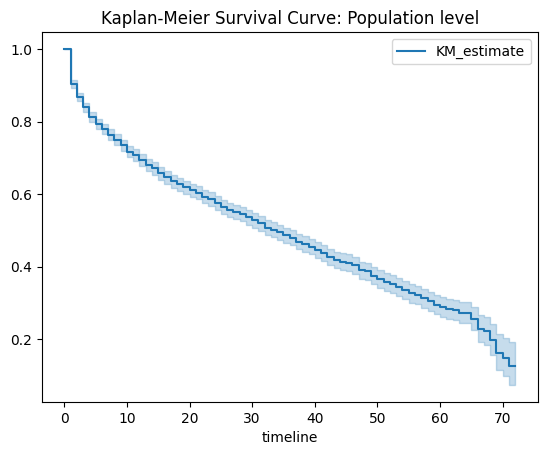

In [27]:
##传入T和C变量进行kmf模型拟合,并绘制生存曲线
kmf.fit(T,C)
kmf.plot(title='Kaplan-Meier Survival Curve: Population level')
##计算中位生存时间（50% 的客户仍然活跃的时间点）
kmf.median_survival_time_

In [78]:
##自定义了一个分组绘制生存函数的方法：定义一个子图的模板，然后对选中的特定列按列的内容进行分组，分组之后在子图模板上绘制对应的曲线图
def plot_km(col):
    fig, ax = plt.subplots(figsize=(4,3))
    for r in telco_pd[col].unique():
        ix = telco_pd[col] == r
        kmf.fit(telco_pd.loc[ix, 'tenure'], telco_pd.loc[ix, 'churn'], label=r)
        kmf.plot_survival_function(ax=ax,title =f'Survival Curve: {col}')
    plt.close(fig)
    return fig
##执行 Log-rank 检验，比较选中列的组间差异是否显著
def print_logrank(col):
  log_rank = pairwise_logrank_test(telco_pd['tenure'], telco_pd[col], telco_pd['churn'])
  return log_rank.summary

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


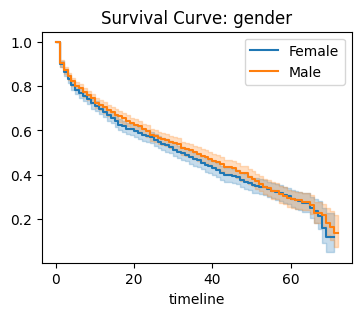

,,test_statistic,p,-log2(p)
Female,Male,1.61011,0.204476,2.289995


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


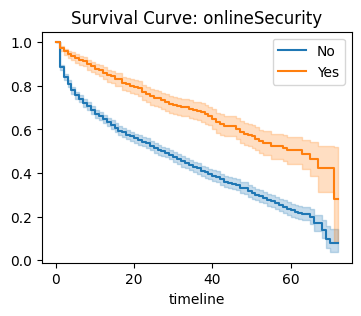

,,test_statistic,p,-log2(p)
No,Yes,75.800079,3.138886e-18,58.144453


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


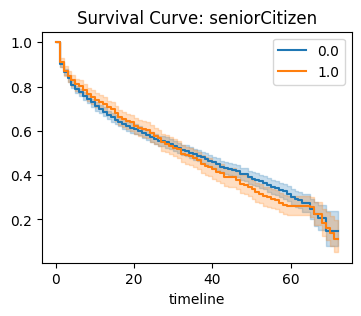

,,test_statistic,p,-log2(p)
0.0,1.0,49.027784,2.523624e-12,38.52764


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


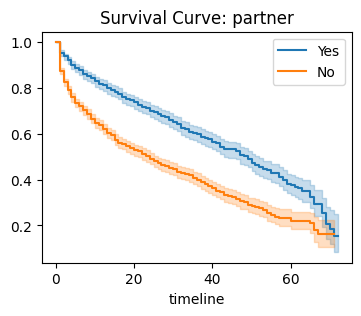

,,test_statistic,p,-log2(p)
No,Yes,257.844159,5.063437e-58,190.331712


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


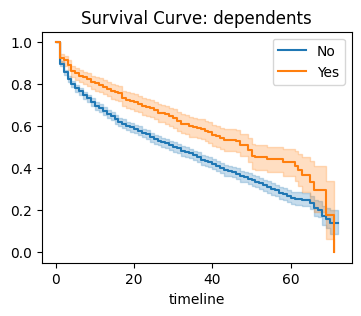

,,test_statistic,p,-log2(p)
No,Yes,13.405914,0.000251,11.96099


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


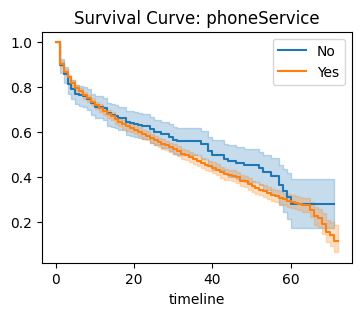

,,test_statistic,p,-log2(p)
No,Yes,0.778505,0.377599,1.405074


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


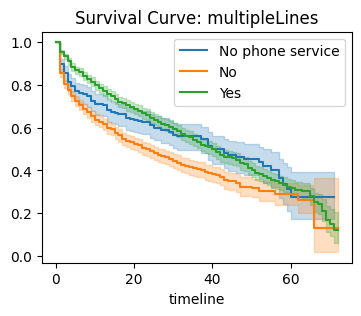

test_statistic             p    -log2(p)
No               No phone service       35.546250  2.490661e-09   28.580824
                 Yes                   411.225536  1.983168e-91  301.307649
No phone service Yes                    44.056629  3.190116e-11   34.867600

/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


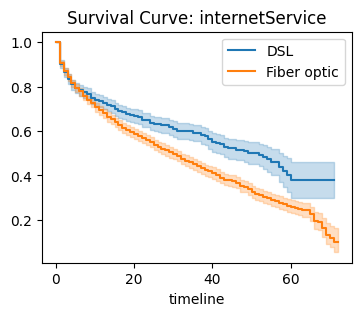

,,test_statistic,p,-log2(p)
DSL,Fiber optic,85.455399,2.369872e-20,65.193753


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


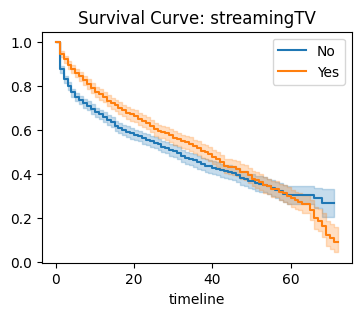

,,test_statistic,p,-log2(p)
No,Yes,140.761789,1.813974e-32,105.442545


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


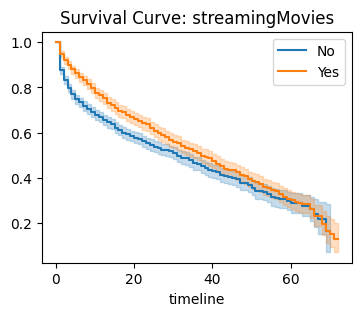

,,test_statistic,p,-log2(p)
No,Yes,170.262183,6.484901e-39,126.858111


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


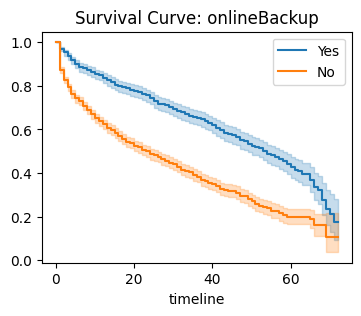

,,test_statistic,p,-log2(p)
No,Yes,300.455875,2.620909e-67,221.179115


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


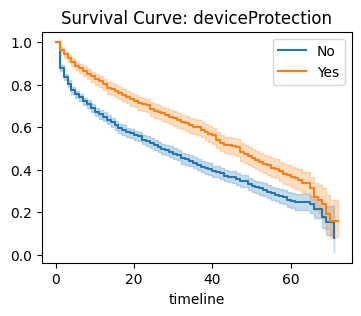

,,test_statistic,p,-log2(p)
No,Yes,169.868512,7.904692e-39,126.572486


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


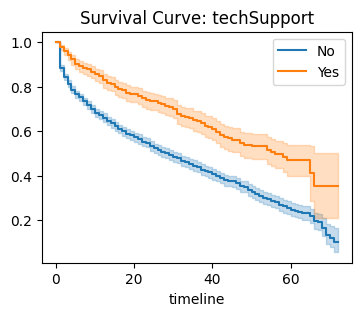

,,test_statistic,p,-log2(p)
No,Yes,25.969416,3.468692e-07,21.459105


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


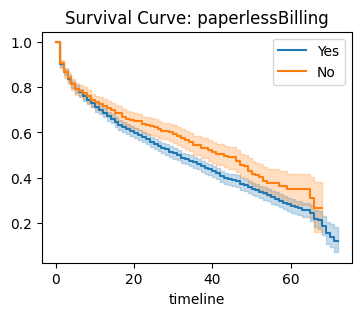

,,test_statistic,p,-log2(p)
No,Yes,25.263459,5.000937e-07,20.931298


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:1185: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.10/dist-packages/lifelines/utils

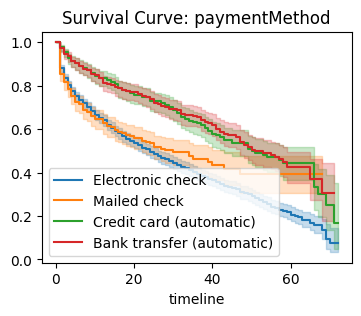

test_statistic  \
Bank transfer (automatic) Credit card (automatic)        0.153545   
                          Electronic check              55.164654   
                          Mailed check                 190.000457   
Credit card (automatic)   Electronic check              45.167592   
                          Mailed check                 165.361074   
Electronic check          Mailed check                  72.323100   

                                                              p    -log2(p)  
Bank transfer (automatic) Credit card (automatic)  6.951703e-01    0.524562  
                          Electronic check         1.108442e-13   43.036532  
                          Mailed check             3.178566e-43  141.174532  
Credit card (automatic)   Electronic check         1.808736e-11   35.686227  
                          Mailed check             7.628420e-38  123.301883  
Electronic check          Mailed check             1.826962e-17   55.603331

In [79]:
##针对各个列进行绘制和分析
for col in ['gender', 'onlineSecurity', 'seniorCitizen', 'partner', 'dependents', 
            'phoneService', 'multipleLines', 'internetService', 'streamingTV', 
            'streamingMovies', 'onlineBackup', 'deviceProtection', 'techSupport', 
            'paperlessBilling', 'paymentMethod']:
    fig = plot_km(col)
    display(fig)
    summary = print_logrank(col)
    display(summary)

In [47]:
##返回特定列特定标签的生存曲线
def get_survival_probs(col,val):
  ix = telco_pd[col] == val
  return kmf.fit(T[ix],C[ix],label=val)  
sp_internet_dsl = get_survival_probs('internetService','DSL')

##返回其中的指定index的值
pd.DataFrame(sp_internet_dsl.survival_function_at_times(range(0,10)))

,DSL
0,1.000000
1,0.902698
2,0.864380
3,0.834702
4,0.810522
5,0.794352
6,0.783900
7,0.776362
8,0.768486
9,0.750833
